# Exam R
Mark Klik & Misja Mikkers

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [310]:
library(tidyverse)

install.packages('gvlma', repos = 'http://cran.us.r-project.org')
library(gvlma)

Installing package into 'C:/Users/tomme/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'gvlma' is in use and will not be installed"

# Assignment 1


## Data

The data are given:


In [311]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

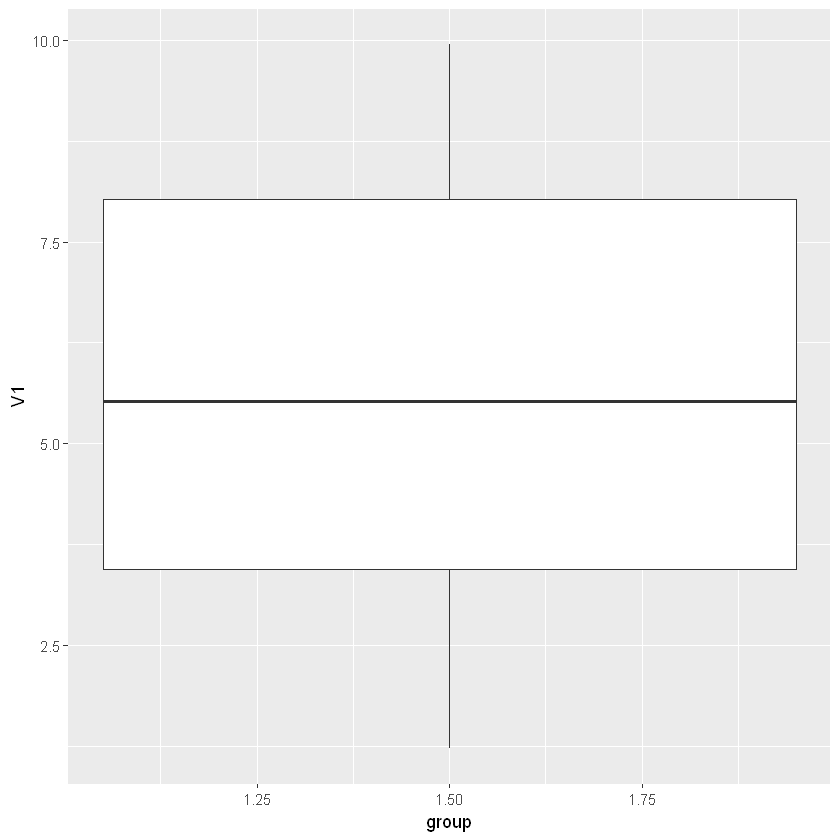

In [312]:
ggplot(data = df1, aes(x= group, y=V1)) + geom_boxplot()
#First, we create a simple graph containing the group variable and the V1 variable. By geom_boxplot we add the box.

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [319]:
reg1 <- lm(data=df1, response ~ V1)
summary(reg1)
#We create a linear model of df1. Since response depends on V1, we place response first and V1 second.


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

In [320]:
gvlma(data = df1, response ~ V1)


Call:
lm(formula = response ~ V1, data = df1)

Coefficients:
(Intercept)           V1  
      2.630       -1.915  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = response ~ V1, data = df1) 

                      Value p-value                Decision
Global Stat        0.654319  0.9568 Assumptions acceptable.
Skewness           0.002398  0.9609 Assumptions acceptable.
Kurtosis           0.007200  0.9324 Assumptions acceptable.
Link Function      0.005852  0.9390 Assumptions acceptable.
Heteroscedasticity 0.638869  0.4241 Assumptions acceptable.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



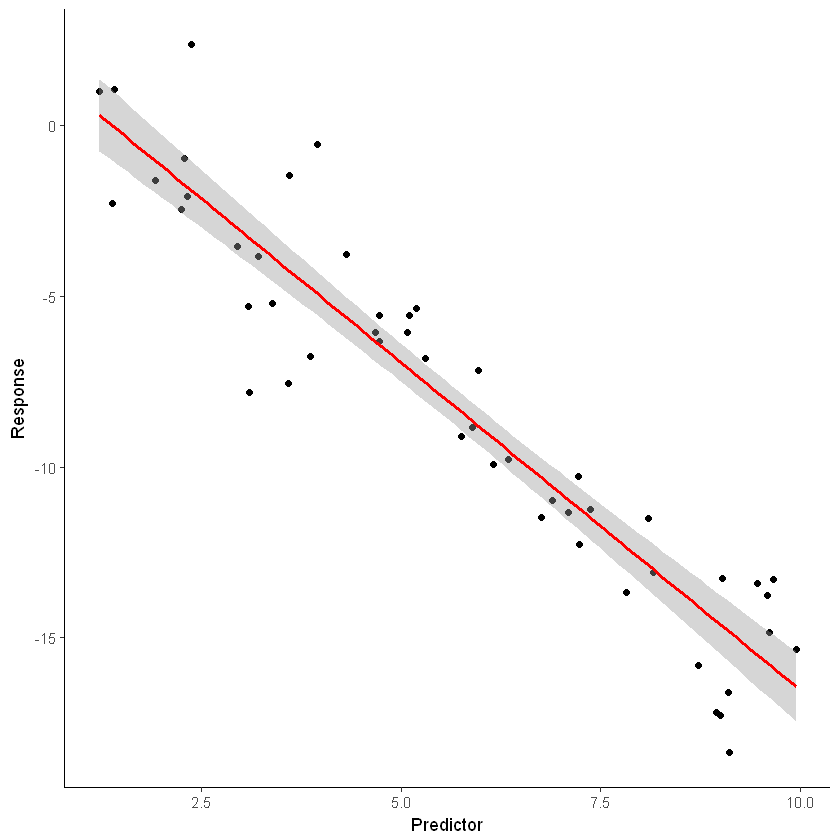

In [321]:
ggplot(df1, aes(x = V1, y = response)) + geom_point() + theme_classic() + 
            xlab('Predictor') + ylab('Response') + geom_smooth(method = 'lm', se = TRUE, col = 'red')
#Again, we made a plot of V1 and y. Now, we added geom_point for the scatter plot. 
#Theme_classic gives us the classic theme, xlab and ylab the labels.
# geom_smooth with method equals lm gives us the regression line. 
# se = TRUE ensures we have a confidence interval and the color set to red ensures we have a red line.

# Assigment 2

# Packages

In [322]:
library(tidyverse)
install.packages("C:Users/tomme/Downloads/thematicmaps_2.1.tar.gz", repos = NULL, type = "source")
#For some reason, jupyter cannot find a package thematicmaps. 
#I downloaded multiple packages from cran.us,but in vain. The zip-file that was available for week 6 works neither.
install.packages(c('maptools', 'rdal', 'rgeos'))

Installing package into 'C:/Users/tomme/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"running command '"C:/Users/tomme/Anaconda/lib/R/bin/x64/R" CMD INSTALL -l "C:\Users\tomme\Documents\R\win-library\3.4" "C:Users/tomme/Downloads/thematicmaps_2.1.tar.gz"' had status 1"Warning message in install.packages("C:Users/tomme/Downloads/thematicmaps_2.1.tar.gz", :
"installation of package 'C:Users/tomme/Downloads/thematicmaps_2.1.tar.gz' had non-zero exit status"Installing packages into 'C:/Users/tomme/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'rdal' is not available (for R version 3.4.3)"

package 'maptools' successfully unpacked and MD5 sums checked
package 'rgeos' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tomme\AppData\Local\Temp\Rtmp6fS7li\downloaded_packages


## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [323]:
map_municipal <-  read.csv2("C:/Users/tomme/Downloads/nld_municipal_map.csv")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.527548325,594393.827234474,1,FALSE,1,0.1
Appingedam,0,251427.775868901,594486.747111725,2,FALSE,1,0.1
Appingedam,0,251668.842999999,594646.77,3,FALSE,1,0.1
Appingedam,0,251713.521000002,594770.885000002,4,FALSE,1,0.1
Appingedam,0,251354.585000001,595461.381999999,5,FALSE,1,0.1
Appingedam,0,251310.272,596022.542,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

In [325]:
read.csv2('C:/Users/tomme/AppData/Local/Temp/Rtmp6fS7li/downloaded_packages')
AddMapLayer(MapPlot(), map_municipal)
#This is the code that would normally lead to the correct answer, but now doesn't since jupyter cannot find AddMapLayer.

Warning message in file(file, "rt"):
"cannot open file 'C:/Users/tomme/AppData/Local/Temp/Rtmp6fS7li/downloaded_packages': Permission denied"

ERROR: Error in file(file, "rt"): cannot open the connection


## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [326]:
#I make numeric values of X and y with as.numeric. Afterwards, I check it with str
pc4_locations <- read.csv2("C:/Users/tomme/Downloads/nld_pc4_locations.csv")%>%
  mutate(X = as.numeric(as.character(X))) %>%
   mutate(Y = as.numeric(as.character(Y)))

str(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


## Assignment 2d

### 2di

Read in the school data


In [327]:
#String tells us again what the dataframe looks like
schools <- read.csv2('C:/Users/tomme/Downloads/schools.csv')
str(schools)

'data.frame':	1603 obs. of  31 variables:
 $ PROVINCIE                                 : Factor w/ 13 levels "                    ",..: 1 2 2 2 2 2 2 2 2 2 ...
 $ BEVOEGD.GEZAG.NUMMER                      : int  41152 10053 10053 13273 13273 13273 13273 13273 13273 13273 ...
 $ BRIN.NUMMER                               : Factor w/ 652 levels "00AH","00AQ",..: 534 382 382 490 490 490 490 490 490 490 ...
 $ VESTIGINGSNUMMER                          : Factor w/ 1603 levels "00AH00","00AH07",..: 1366 965 966 1252 1253 1254 1255 1256 1257 1258 ...
 $ VESTIGINGSNAAM                            : Factor w/ 977 levels "'s Gravendreef College voor vbo, mavo en havo",..: 739 812 812 589 589 589 589 589 589 589 ...
 $ STRAATNAAM                                : Factor w/ 1308 levels "'s-Heer Elsdorpweg",..: 3 1306 143 782 1021 334 1082 516 304 9 ...
 $ HUISNUMMER.TOEVOEGING                     : Factor w/ 322 levels "            ",..: 1 113 102 316 2 102 83 162 162 305 ...
 $ POSTCODE             

### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [328]:
#To select only the numbers of the ZIP-code, I assigned PC4 to the substring 1-4. 
#Then, I selected the PC4 variable and the DENOMINATIE variable.
schools1 <- schools %>% mutate(PC4 = substr(POSTCODE, start = 1, stop = 4))

select(schools1, PC4, DENOMINATIE)

PC4,DENOMINATIE
,Openbaar
9406,Openbaar
9401,Openbaar
9402,Openbaar
9331,Openbaar
9411,Openbaar
9461,Openbaar
9402,Openbaar
9402,Openbaar
9403,Openbaar


### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [329]:
#We merge the data of pc4_locations and schools 1 by P4 to obtain only the rows where the pc4_locations values are equal.
#Then, we select Catholic and Protestant schools by filtering them out of DENOMINATIE.
school_loc <- merge(pc4_locations, schools1, by = 'PC4')
filter(school_loc, DENOMINATIE %in% c('Rooms-Katholiek','Protestants-Christelijk'))

PC4,X,Y,PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,...,RPA.GEBIED.CODE,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM
1065,116701.2,485645.8,Noord-Holland,41217,01TC,01TC00,Scholengemeenschap voor Vwo Havo Mavo Het Hervormd Lyceum,Hemsterhuisstraat,79,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1071,120223.0,485571.3,Noord-Holland,40776,02AN,02AN00,Fons Vitae Lyceum Rooms Katholiek Scholengemeenschap voor Vwo en Havo,Reijnier Vinkeleskade,53,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1077,120152.7,484262.8,Noord-Holland,41217,02AR,02AR00,Scholengemeenschap voor Athenum en Havo Het Hervormd Lyceum Zuid,Brahmsstraat,7,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1077,120152.7,484262.8,Noord-Holland,40776,14SE,14SE00,Scholengemeenschap Sint Nicolaas Lyceum voor Lyceum en Havo,Beethovenplein,2,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1081,118277.6,482449.5,Noord-Holland,41217,14VY,14VY00,Chr Sgm Buitenveldert v Gymn Ath Havo en Mavo,De Cuserstraat,3,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1132,132947.2,501873.0,Noord-Holland,72853,20GS,20GS01,Don Bosco College Atheneum Havo Vmbo Lwoo,Val van Urk,1,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1132,132947.2,501873.0,Noord-Holland,72853,20GS,20GS00,Don Bosco College Atheneum Havo Vmbo Lwoo,Heideweg,2,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1185,118214.4,478212.6,Noord-Holland,41217,02TE,02TE00,H Wesselink College Christelijke Scholengemeenschap voor Vwo Havo Mavo,Startbaan,3,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1185,118214.4,478212.6,Noord-Holland,71553,02QZ,02QZ00,Keizer Karel College Vwo Havo,Elegast,5,...,20,Zuidelijk Noord-Holland,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam
1211,140459.1,470645.8,Noord-Holland,40676,00PS,00PS10,Verenigde Scholen J.A. Alberdingk Thijm Voortgezet Onderwijs,Achterom,152,...,16,Gooi en Vechtstreek,20,Gooi en Vechtstreek,24,Het Gooi en Vechtstreek,15,Zuid-Noord-Holland,20,Gooi en Vechtstreek


## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


In [330]:
religiousschools <- filter(school_loc, DENOMINATIE %in% c('Rooms-Katholiek','Protestants-Christelijk'))

AddMapLayer(MapPlot(), map_municipal) %>%
  AddPointsLayer(religiousschools)
#First, I assigned the result of the previous exercise to the dataframe religiousschools.
#Again, AddMapLayer doesn't work, so I inserted the code I believe that should've worked. 
#We add the variable religiousschools now to the map by 'AddPointsLayer'.

ERROR: Error in AddMapLayer(MapPlot(), map_municipal): could not find function "AddMapLayer"


End of notebook